# MODELO  NO SUPERVISADO: K-MEANS

OBJETIVO: Agrupar en distintos clusters a los vinos de acuerdo a sus características de contenido de ácido cítrico y azucar residual.

In [186]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [187]:
p1 = pd.read_csv('..\\datasets\\WineQT.csv')

In [188]:
p1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [189]:
# Se verifica que no hayan valores nulos
p1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [190]:
# Se verifica el tipo de dato de cada columna
p1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [191]:
# Se observan los datos numericos, para proceder a normalizarlos
p1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Dado que se detectó que la columna residual sugar, contenía muchos outliers, se eliminan con el siguiente código 

In [257]:
#Calcular el rango intercuartílico (IQR)
Q1 = p1['residual sugar'].quantile(0.25)
Q3 = p1['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = (p1['residual sugar'] < lower_bound) | (p1['residual sugar'] > upper_bound)
p1 = p1[~outliers]

In [231]:
# Se escalan los datos:
p1_scal = (p1-p1.min())/(p1.max()-p1.min())
p1_scal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.269231,0.397260,0.00,0.363636,0.106845,0.192308,0.176101,0.682259,0.606299,0.137725,0.178571,0.4,0.000000
1,0.307692,0.520548,0.00,0.618182,0.143573,0.461538,0.383648,0.593998,0.362205,0.209581,0.250000,0.4,0.000626
2,0.307692,0.438356,0.04,0.509091,0.133556,0.269231,0.301887,0.611650,0.409449,0.191617,0.250000,0.4,0.001252
3,0.634615,0.109589,0.56,0.363636,0.105175,0.307692,0.339623,0.699912,0.330709,0.149701,0.250000,0.6,0.001879
4,0.269231,0.397260,0.00,0.363636,0.106845,0.192308,0.176101,0.682259,0.606299,0.137725,0.178571,0.4,0.002505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.163462,0.267123,0.13,0.509091,0.106845,0.538462,0.213836,0.500441,0.535433,0.251497,0.464286,0.6,0.996869
1139,0.211538,0.342466,0.08,0.363636,0.093489,0.519231,0.201258,0.568402,0.535433,0.293413,0.196429,0.6,0.997495
1140,0.153846,0.328767,0.08,0.400000,0.130217,0.596154,0.238994,0.426302,0.559055,0.149701,0.375000,0.4,0.998121
1141,0.125000,0.294521,0.10,0.472727,0.083472,0.730769,0.283019,0.445719,0.614173,0.257485,0.500000,0.6,0.998748


In [232]:
# Se seleccionan las variables para el modelo
x=p1_scal[['citric acid', 'residual sugar']].values
pd.DataFrame(x). head(5)

,0,1
0,0.00,0.363636
1,0.00,0.618182
2,0.04,0.509091
3,0.56,0.363636
4,0.00,0.363636


### Método del codo: 
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.

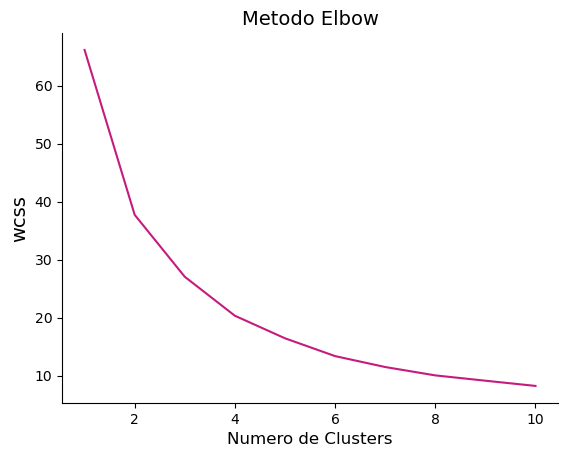

In [233]:
#Se realiza el método del codo para determinar la cantidad de clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre 2 o 3, que pueden ser la punto en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación.


### N° de clusters:3

Se comenzará aplicando 3 clusters y luego se analizarán con 2 clusters, para poder comparar el desempeño y tomar una desición final 

In [234]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)

KMeans(n_clusters=3, random_state=0)

In [235]:
# Etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [236]:
# Se hace la predicción:
y_means3=kmeansmodel3.fit_predict(x)

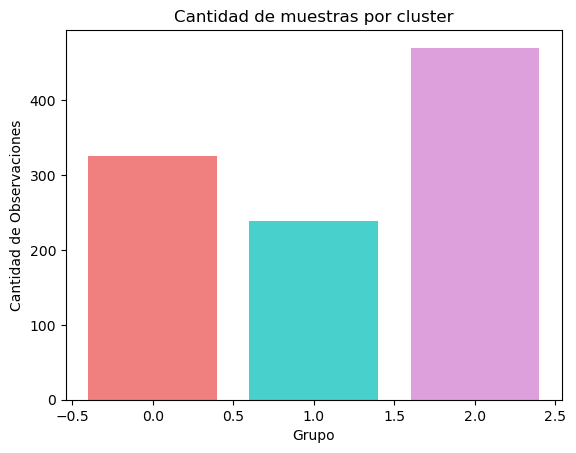

In [237]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en dos clusters. 

In [238]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.40646154 0.38232168]
 [0.39289916 0.68265852]
 [0.09208511 0.4144294 ]]


### N° de clusters:2

In [239]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)

KMeans(n_clusters=2, random_state=0)

In [240]:
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [241]:
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(x)

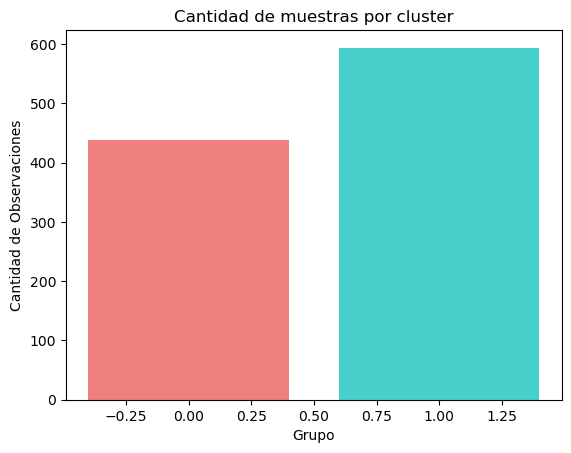

In [242]:
#Se verifica la cantidad de observaciones (2 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


Se puede observar que con dos clusters, la cantidad de muestras es bastante equitativa para cada grupo.

In [243]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.44603645 0.51857527]
 [0.1230303  0.42736455]]


### N° de clusters:4

In [244]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)

KMeans(n_clusters=4, random_state=0)

In [245]:
# Etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [246]:
# Se hace la predicción:
y_means4=kmeansmodel4.fit_predict(x)

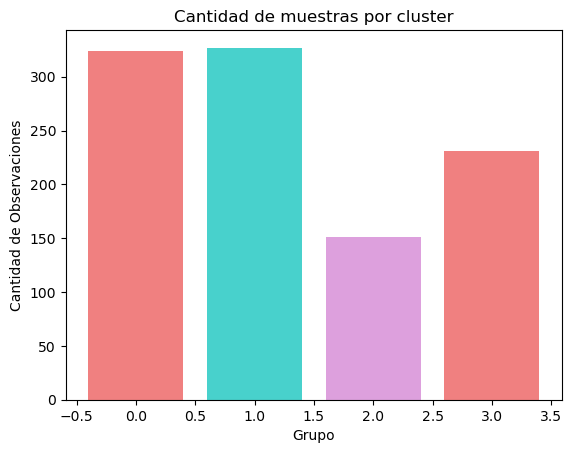

In [247]:
#Se verifica la cantidad de observaciones (4 clusters)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


Se puede observar que con 4 clusters, la cantidad de muestras es desigual para cada grupo.

In [248]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.44603645 0.51857527]
 [0.1230303  0.42736455]]


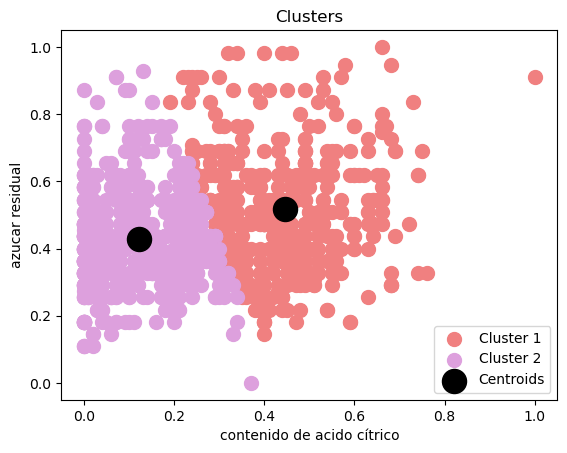

In [260]:
plt.scatter(x[y_means2 == 0, 0], x[y_means2 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means2 == 1, 0], x[y_means2 == 1, 1], s = 100, c = 'plum', label = 'Cluster 2')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('contenido de acido cítrico')
plt.ylabel('azucar residual')
plt.legend()
plt.show()

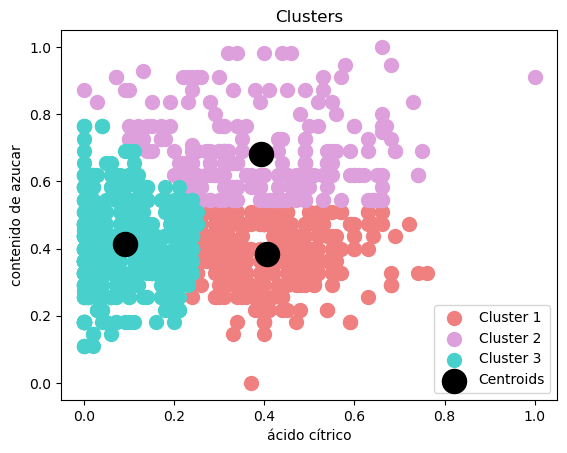

In [261]:
plt.scatter(x[y_means3 == 0, 0], x[y_means3 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means3 == 1, 0], x[y_means3 == 1, 1], s = 100, c =  'plum', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('ácido cítrico')
plt.ylabel('contenido de azucar')
plt.legend()
plt.show()

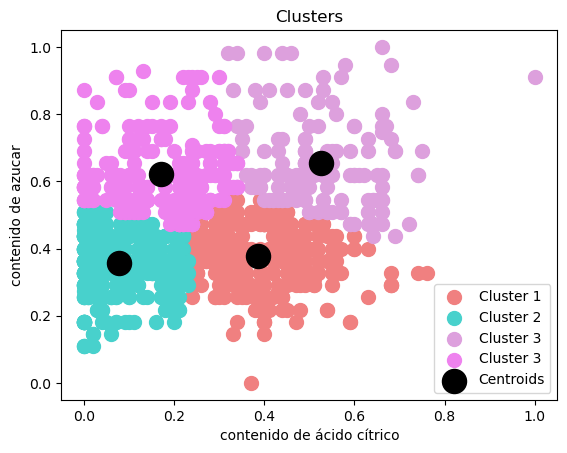

In [263]:
plt.scatter(x[y_means4 == 0, 0], x[y_means4 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means4 == 1, 0], x[y_means4 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means4 == 2, 0], x[y_means4 == 2, 1], s = 100, c = 'plum', label = 'Cluster 3')
plt.scatter(x[y_means4 == 3, 0], x[y_means4 == 3, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('contenido de ácido cítrico')
plt.ylabel('contenido de azucar')
plt.legend()
plt.show()

In [252]:
# Se evalua con la suma de los cuadrados de las distancias (SSD)
SSD2= kmeansmodel2.inertia_
print( "SSD: ",SSD2)

SSD:  37.74078086069757


In [253]:
# Se evalua con la suma de los cuadrados de las distancias (SSD)
SSD3= kmeansmodel3.inertia_
print( "SSD: ",SSD3)

SSD:  27.05376238842168


In [254]:
# Se evalua con la suma de los cuadrados de las distancias (SSD)
SSD4= kmeansmodel4.inertia_
print( "SSD: ",SSD4)

SSD:  20.333863675304944


In [255]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))

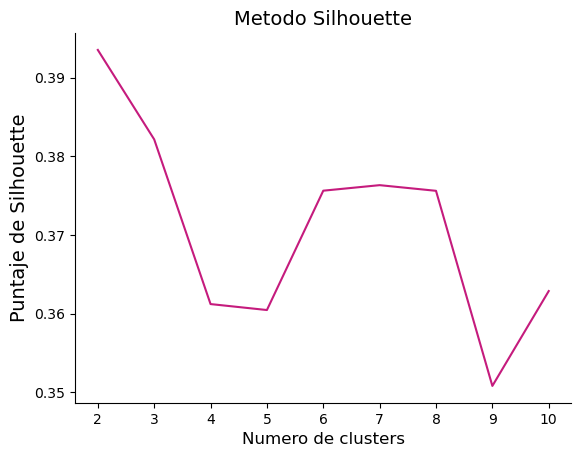

In [256]:
# Se grafica
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

## CONCLUSIÓN:

Observando los gráficos de distribución podemos concluir que el algoritmo de kmmeans es el adecuado para estos datos debido a la forma esférica de los clusters.<br>
A travéz del método  del codo y silhoutte, concluimos que el número más adecuado de cluster es 2. Ésto también es consistente con lo observado en el histograma que muestra que en dos grupos, el numero de muestras en cada uno  es similar.<br> 
Logramos el objetivo de agrupar a los vinos por su contenido de ácido cítrico y azucar residual, y se observa que pueden definirse dos grupos, uno con mayor contyenido de ácido cítrico que otro.<br> 